<a href="https://colab.research.google.com/github/nazirumar/Complete_Sentiment_Analysis_of_Amanzon_Reviews/blob/main/Complete_Sentiment_Analysis_of_Amanzon_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')
import bz2

Download the Data from the Google colab for sentinmental Analysis

In [7]:
#  ! pip install -q kaggle

In [8]:
# from google.colab import files

In [9]:
#  ! kaggle datasets list

In [10]:
# !kaggle datasets download -d bittlingmayer/amazonreviews

In [11]:
# !unzip '/content/amazonreviews.zip' -d '/content/drive/MyDrive/NLP'

In [12]:
trainfile = bz2.BZ2File('/content/drive/MyDrive/NLP/train.ft.txt.bz2','r')
testfile = bz2.BZ2File('/content/drive/MyDrive/NLP/test.ft.txt.bz2','r')
lines = trainfile.readlines()

In [13]:
lines[0]

b'__label__2 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^\n'

In [14]:
len(lines)

3600000

In [15]:
docSentimentList=[]
def getDocumentSentimentList(docs,splitStr='__label__'):
    for i in range(len(docs)):
        #print('Processing doc ',i,' of ',len(docs))
        text=str(lines[i])
        #print(text)
        splitText=text.split(splitStr)
        secHalf=splitText[1]
        text=secHalf[2:len(secHalf)-1]
        sentiment=secHalf[0]
        #print('First half:',secHalf[0],'\nsecond half:',secHalf[2:len(secHalf)-1])
        docSentimentList.append([text,sentiment])
    print('Done!!')
    return docSentimentList

In [16]:
docSentimentList=getDocumentSentimentList(lines[:1000000],splitStr='__label__')

Done!!


In [17]:
train_df = pd.DataFrame(docSentimentList,columns=['text','sentiment'])
train_df.head()

,text,sentiment
0,Stuning even for the non-gamer: This sound tra...,2
1,The best soundtrack ever to anything.: I'm rea...,2
2,Amazing!: This soundtrack is my favorite music...,2
3,Excellent Soundtrack: I truly like this soundt...,2
4,"Remember, Pull Your Jaw Off The Floor After He...",2


In [18]:
train_df.describe()

,text,sentiment
count,1000000,1000000
unique,1000000,2
top,Stuning even for the non-gamer: This sound tra...,2
freq,1,505678


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   text       1000000 non-null  object
 1   sentiment  1000000 non-null  object
dtypes: object(2)
memory usage: 15.3+ MB


In [20]:
train_df.groupby('sentiment').describe()

text                                                             \
            count  unique                                                top   
sentiment                                                                      
1          494322  494322  Buyer beware: This is a self-published book, a...   
2          505678  505678  Stuning even for the non-gamer: This sound tra...   

                
          freq  
sentiment       
1            1  
2            1

In [21]:
train_df['sentiment'].value_counts()

,count
sentiment,
2,505678
1,494322


Chech the len of text

In [22]:
train_df['text_len']=train_df['text'].apply(lambda x:len(x))
train_df.head()
train_df.iloc[:2]

,text,sentiment,text_len
0,Stuning even for the non-gamer: This sound tra...,2,428
1,The best soundtrack ever to anything.: I'm rea...,2,511


In [23]:
import seaborn as sns


Text(0.5, 1.0, 'Count of Sentiment')

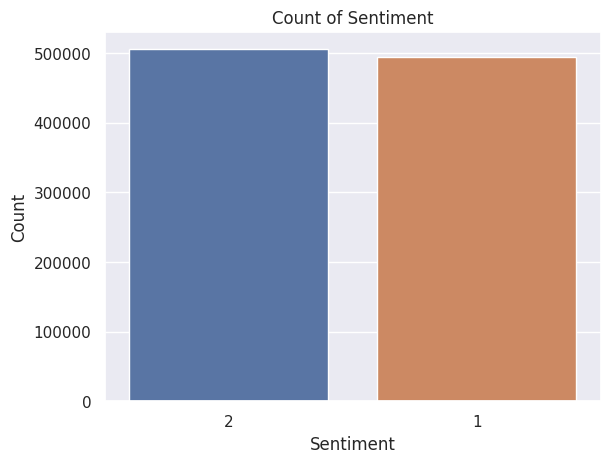

In [24]:
sns.set(style='darkgrid')
sns.countplot(x='sentiment',data=train_df, hue='sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Count of Sentiment')


<Axes: ylabel='Frequency'>

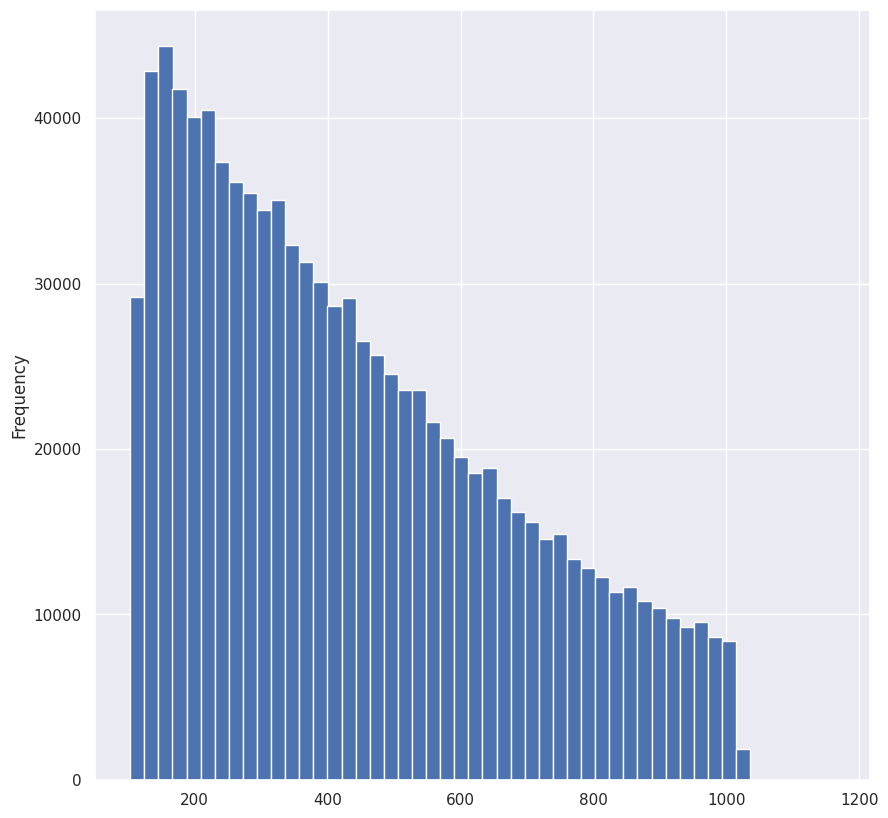

In [25]:
train_df['text_len'].plot(kind='hist', bins=50, figsize=(10,10))

In [26]:
train_df[train_df['text_len'] == train_df['text_len'].max()]

,text,sentiment,text_len
834053,Marie-H\xc3\xa9l\xc3\xa8ne prend sa place!: Ma...,2,1163


In [27]:
train_df[train_df['text_len'] == train_df['text_len'].min()]

,text,sentiment,text_len
2601,dont know!: the program looks fun but the soft...,1,103
4360,okay: I liked the book but it wasn't one of my...,2,103
6818,"1984: Love the book, very appropriate for the ...",2,103
7325,OK: The book was not that bad-but i wouldn't s...,1,103
7933,"A few more chances: If life could be that way,...",2,103
...,...,...,...
988251,"IT'S ALL GOOD: I THINK THIS CD IS DA BOMB, IT ...",2,103
995965,A great movie: 'The Danish Solution' is a grea...,2,103
996484,X-Files Season 8: Some good episodes but most ...,2,103
997856,Junk: Will amplify noise only about 1 feet awa...,1,103


array([<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>],
      dtype=object)

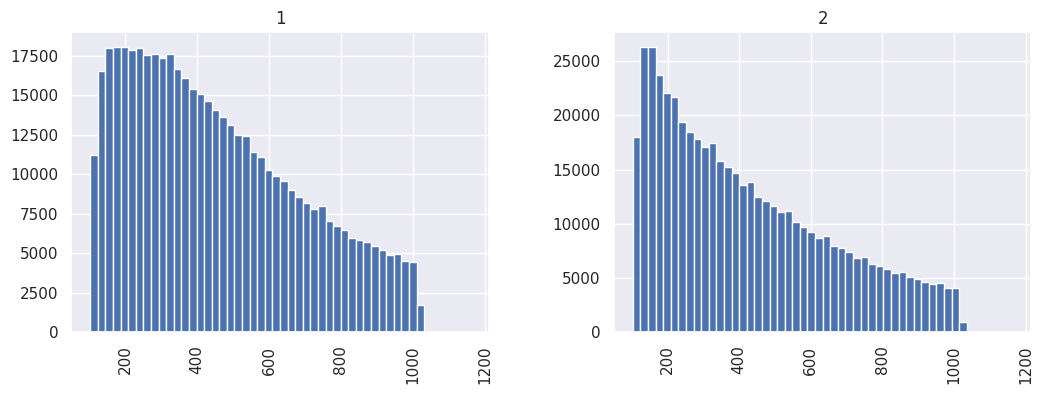

In [28]:
train_df.hist(column='text_len', by='sentiment', bins=50,figsize=(12,4))


In [29]:
train_df['sentiment'][train_df['sentiment']=='1'] = 0
train_df['sentiment'][train_df['sentiment']=='2'] = 1

In [30]:
train_df.tail(20)

,text,sentiment,text_len
999980,Great Product: Got this gift from Santa and Lo...,1,344
999981,Ineptly made comedy dealing with romantic inde...,0,746
999982,Don\' t watch it: Unfortunately this film is t...,0,217
999983,Not what I had hoped for.: This movie is a who...,0,692
999984,Incredible: Think twice before buying Canon L ...,1,350
999985,Great Lens: I picked up a 5D in March with a 2...,1,379
999986,Best General Purpose Walk-Around Lens: That bi...,1,727
999987,For a L lens I expect higher quality. Error 01...,0,986
999988,Great Lens: This is a great lens. My first L l...,1,104
999989,"Dreaded err01: I used this lens for one shoot,...",0,755


In [31]:
train_df['sentiment'].value_counts()

,count
sentiment,
1,505678
0,494322


In [32]:
train_df['word_count'] = train_df['text'].str.lower().str.split().apply(len)
train_df.head(10)

,text,sentiment,text_len,word_count
0,Stuning even for the non-gamer: This sound tra...,1,428,80
1,The best soundtrack ever to anything.: I'm rea...,1,511,97
2,Amazing!: This soundtrack is my favorite music...,1,768,129
3,Excellent Soundtrack: I truly like this soundt...,1,745,118
4,"Remember, Pull Your Jaw Off The Floor After He...",1,483,87
5,an absolute masterpiece: I am quite sure any o...,1,827,142
6,"Buyer beware: This is a self-published book, a...",0,743,139
7,Glorious story: I loved Whisper of the wicked ...,1,524,105
8,A FIVE STAR BOOK: I just finished reading Whis...,1,526,103
9,Whispers of the Wicked Saints: This was a easy...,1,303,63


In [33]:
train_df['word_count'].describe()


,word_count
count,1000000.000000
mean,79.380672
std,43.075900
min,2.000000
25%,43.000000
50%,71.000000
75%,109.000000
max,241.000000


In [34]:
train_df[train_df['word_count'] == train_df['word_count'].min()]


,text,sentiment,text_len,word_count
567147,Great: TeTerriffic!Terriffic!Terriffic!Terriff...,1,131,2
759194,Disappointing: Thisis.the.very.first.book.by.h...,0,197,2


In [35]:
import string

In [36]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [37]:
train_df['text'] = train_df['text'].apply(remove_punctuations)
train_df.shape


(1000000, 4)

In [38]:
train_df.head(10)

,text,sentiment,text_len,word_count
0,Stuning even for the nongamer This sound track...,1,428,80
1,The best soundtrack ever to anything Im readin...,1,511,97
2,Amazing This soundtrack is my favorite music o...,1,768,129
3,Excellent Soundtrack I truly like this soundtr...,1,745,118
4,Remember Pull Your Jaw Off The Floor After Hea...,1,483,87
5,an absolute masterpiece I am quite sure any of...,1,827,142
6,Buyer beware This is a selfpublished book and ...,0,743,139
7,Glorious story I loved Whisper of the wicked s...,1,524,105
8,A FIVE STAR BOOK I just finished reading Whisp...,1,526,103
9,Whispers of the Wicked Saints This was a easy ...,1,303,63


In [39]:
len(train_df['word_count'][train_df['word_count']<=25])


63720

In [40]:
train_df1 = train_df[:][train_df['word_count']<=25]
train_df1.head()

,text,sentiment,text_len,word_count
44,autumn got this for my daughter in NC she is n...,1,112,22
58,Hunting the Hard Way Thia was a gift for my Hu...,1,121,25
77,Smells divine This is my second bottle of shee...,1,145,25
78,Very disappointed This perfume is just AWFUL S...,0,155,24
99,Caution These tracks are not the original vers...,0,148,22


In [41]:
train_df1.head()


,text,sentiment,text_len,word_count
44,autumn got this for my daughter in NC she is n...,1,112,22
58,Hunting the Hard Way Thia was a gift for my Hu...,1,121,25
77,Smells divine This is my second bottle of shee...,1,145,25
78,Very disappointed This perfume is just AWFUL S...,0,155,24
99,Caution These tracks are not the original vers...,0,148,22


In [42]:
train_df1['sentiment'].value_counts()


,count
sentiment,
1,39932
0,23788


In [43]:
train_df1.shape

(63720, 4)

In [44]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
from nltk.corpus import stopwords
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer


st_words = stopwords.words('english')
vectorizer = CountVectorizer(stop_words=st_words, min_df=.0001,lowercase=1)
vectorizer.fit(train_df1['text'].values)

CountVectorizer(lowercase=1, min_df=0.0001,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [46]:
word_list = list(vectorizer.vocabulary_.keys())
stopwords = list(vectorizer.stop_words)

In [47]:
stopwords[0]

'i'

In [48]:
len(word_list), len(stopwords)

(9059, 179)

In [49]:
stopwords_df = pd.DataFrame(stopwords, columns=['stopwords'])
stopwords_df.head()

,stopwords
0,i
1,me
2,my
3,myself
4,we


In [50]:
word_list_df = pd.DataFrame(word_list, columns=['words_list'])
word_list_df.head()

,words_list
0,got
1,daughter
2,making
3,prefect
4,bread


Remove the Stop word in the dataset

In [51]:
def remove_words(raw_sen,stop_words):
    sen = [w for w in raw_sen if w not in stop_words]
    return sen

In [52]:
def reviewEdit(raw_sen_list,stop_words):
    sen_list = []
    for i in range(len(raw_sen_list)):
        raw_sen = raw_sen_list[i].split()
        sen_list.append(remove_words(raw_sen,stop_words))
    return sen_list

In [53]:
sen_list = reviewEdit(list(train_df1['text']), stopwords)
sen_list[2]


['Smells',
 'divine',
 'This',
 'second',
 'bottle',
 'sheer',
 'freesia',
 'I',
 'love',
 'fragrance',
 'light',
 'delicate',
 'sent',
 'beautiful',
 'like',
 'summer',
 'dayn']

# Word2Vector Creation

In [54]:
from gensim.models import Word2Vec

wv_model = Word2Vec(sen_list, vector_size=200)

In [55]:
wv_model.wv.vectors.shape

(14486, 200)

In [56]:
wv_model.wv.most_similar('car')

[('pair', 0.9363850355148315),
 ('lights', 0.9059572219848633),
 ('bottle', 0.9029802680015564),
 ('heads', 0.8962922692298889),
 ('cards', 0.8962757587432861),
 ('house', 0.8918024301528931),
 ('pieces', 0.8851345181465149),
 ('system', 0.880232572555542),
 ('replace', 0.880149245262146),
 ('camcorder', 0.8792808055877686)]

In [57]:
def fun(sen_list,wv_model):
    word_set = set(wv_model.wv.index_to_key)
    X = np.zeros([len(sen_list),25,200])
    c = 0
    for sen in sen_list:
        nw=24
        for w in list(reversed(sen)):
            if w in word_set:
                X[c,nw] = wv_model.wv[w]
                nw=nw-1
        c=c+1
    return X

In [58]:
X = fun(sen_list,wv_model)
X

array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [-0.01720341, -0.07446171,  0.03029027, ..., -0.09439643,
         -0.06080546, -0.00607306],
        [ 0.24509178, -0.26746836, -0.33542338, ...,  0.11527613,
         -0.33986992,  0.37181607],
        [ 0.0107072 , -0.03025186,  0.00998002, ..., -0.05031817,
         -0.02635319,  0.00435602]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [-0.12745385, -0.63654476, -0.06488547, ..., -

In [59]:
from sklearn.model_selection import train_test_split
y = train_df1['sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [60]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: " ,y_test.shape)

X_train Shape:  (57348, 25, 200)
X_test Shape:  (6372, 25, 200)
y_train Shape:  (57348,)
y_test Shape:  (6372,)


**Build The Model - Bidirectional LSTM GRU**

In [61]:
import keras.backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, LSTM, SimpleRNN, GRU, Bidirectional, Input, Concatenate, Multiply, Lambda, Reshape
import tensorflow as tf

# Input layer
input_st = Input(shape=(25, 200))

# First Bidirectional GRU layer
lstm1 = Bidirectional(GRU(200, activation='relu', return_sequences=True), merge_mode='mul')(input_st)
print("lstm1 shape: ", lstm1.shape)  # Should be (None, 25, 200)

# Second Bidirectional GRU layer
lstm2 = Bidirectional(GRU(1, activation='relu', return_sequences=True), merge_mode='mul')(lstm1)
print("lstm2 shape: ", lstm2.shape)  # Should be (None, 25, 1)

# Reshape and activation operations
lstm2 = Reshape((-1,))(lstm2)
lstm2 = Activation('sigmoid')(lstm2)
lstm2 = Reshape((-1, 1))(lstm2)

# Multiply lstm1 with lstm2
mult = Multiply()([lstm1, lstm2])

# Summation along axis 1 using Lambda layer
add = Lambda(lambda x: tf.reduce_sum(x, axis=1), output_shape=(200,))(mult)

# Dense layers
dense = Dense(100, activation='relu')(add)
output = Dense(1, activation='sigmoid')(dense)

# Define the model
model = Model(inputs=input_st, outputs=output)

# Print model summary
print(model.summary())


lstm1 shape:  (None, 25, 200)
lstm2 shape:  (None, 25, 1)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 25, 200)        │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional             │ (None, 25, 200)        │        482,400 │ input_layer[0][0]      │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_1           │ (None, 25, 1)          │          1,218 │ bidirectional[0][0]    │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 25)             │              0 │ bidirectional_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 25)             │              0 │ reshape[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_1 (Reshape)       │ (None, 25, 1)          │              0 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply (Multiply)       │ (None, 25, 200)        │              0 │ bidirectional[0][0],   │
│                           │                        │                │ reshape_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 200)            │              0 │ multiply[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 100)            │         20,100 │ lambda[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │            101 │ dense[0][0]            │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 503,819 (1.92 MB)

 Trainable params: 503,819 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

None


In [62]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)


In [63]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')


In [64]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
hist = model.fit(X_train,y_train,validation_split=0.1,epochs=10, batch_size=512,callbacks=[early_stop])


Epoch 1/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 108ms/step - accuracy: 0.7954 - loss: 0.4138 - val_accuracy: 0.8783 - val_loss: 0.2959
Epoch 2/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.8856 - loss: 0.2764 - val_accuracy: 0.8825 - val_loss: 0.2802
Epoch 3/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.8941 - loss: 0.2534 - val_accuracy: 0.8893 - val_loss: 0.2662
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.9008 - loss: 0.2403 - val_accuracy: 0.8956 - val_loss: 0.2557
Epoch 5/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9095 - loss: 0.2210 - val_accuracy: 0.8950 - val_loss: 0.2546
Epoch 6/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9125 - loss: 0.2139 - val_accuracy: 0.8966 - val_loss: 0.2548
Epoch 7/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.9173 - loss: 0.2021 - val_accuracy: 0.8924 - val_loss: 0.2733


In [65]:
# Convert X_test and y_test to float32
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

model.evaluate(X_test, y_test, batch_size=64)

100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9092 - loss: 0.2486


[0.25168612599372864, 0.9042686820030212]

In [66]:
scores = model.evaluate(X_test, y_test)
print("Test acc: %.2f%%" % (scores[1]*100))

200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9089 - loss: 0.2494
Test acc: 90.43%


In [67]:
model.evaluate(X_train, y_train, batch_size=1024)


57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9199 - loss: 0.1917


[0.19956286251544952, 0.9172769784927368]

In [68]:
scores = model.evaluate(X_train, y_train)
print("Train acc: %.2f%%" % (scores[1]*100))


1793/1793 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9202 - loss: 0.1910
Train acc: 91.73%


In [69]:
prob_test = model.predict(X_test).reshape((-1,))
pred_test = np.array([1 if y>0.5 else 0 for y in prob_test])
y_test = y_test.astype('int')
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      2367
           1       0.94      0.91      0.92      4005

    accuracy                           0.90      6372
   macro avg       0.90      0.90      0.90      6372
weighted avg       0.91      0.90      0.90      6372



<Axes: xlabel='Predicted', ylabel='Actual'>

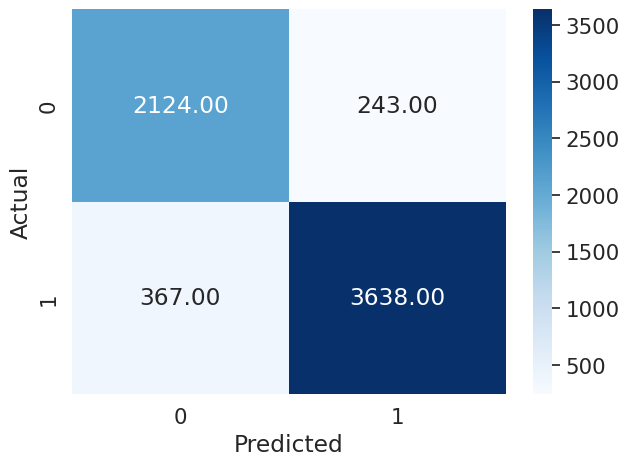

In [70]:

from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
data = confusion_matrix(y_test, pred_test)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (7,5))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True, fmt='.2f')

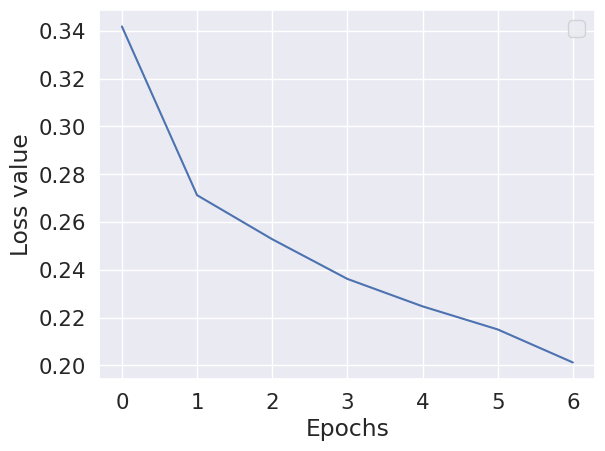

In [71]:

import matplotlib.pyplot as plt
loss_curve = hist.history['loss']
epoch_c = list(range(len(loss_curve)))
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.plot(epoch_c,loss_curve)
plt.legend()
plt.show()

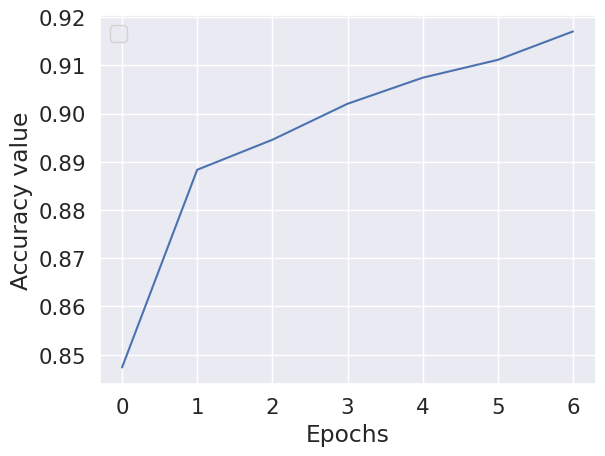

In [72]:
accuracy_curve = hist.history['accuracy']
epoch_c = list(range(len(loss_curve)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy value')
plt.plot(epoch_c,accuracy_curve)
plt.legend()
plt.show()

In [73]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [74]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

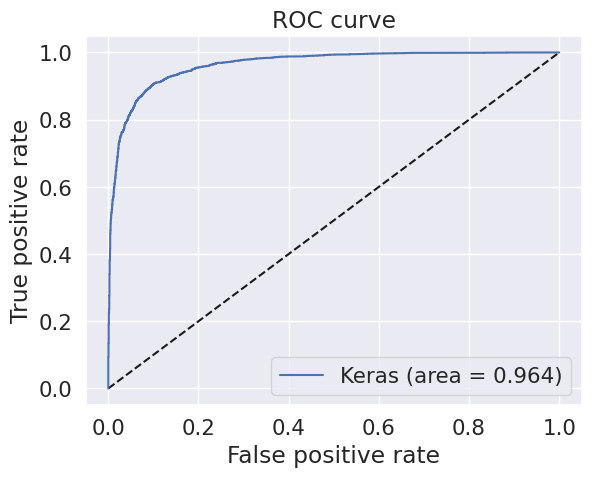

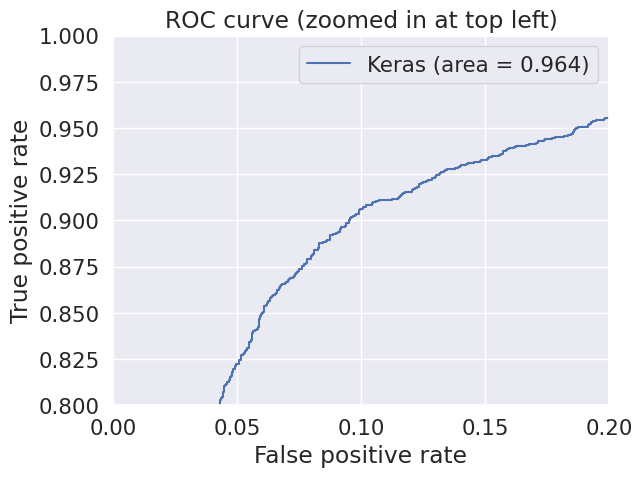

In [75]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [76]:
model.save('model.keras')

In [77]:
model.predict(X_test)

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


array([[0.67958033],
       [0.71760565],
       [0.97002923],
       ...,
       [0.30747783],
       [0.8250611 ],
       [0.05703444]], dtype=float32)

In [80]:
X.shape

(63720, 25, 200)

In [81]:
train_df1.shape

(63720, 4)

In [82]:
train_df1['predicted_sentiment'] = model.predict(X)

1992/1992 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step


In [83]:
train_df1.head()

,text,sentiment,text_len,word_count,predicted_sentiment
44,autumn got this for my daughter in NC she is n...,1,112,22,5.867833e-01
58,Hunting the Hard Way Thia was a gift for my Hu...,1,121,25,9.916480e-01
77,Smells divine This is my second bottle of shee...,1,145,25,9.966779e-01
78,Very disappointed This perfume is just AWFUL S...,0,155,24,1.001087e-08
99,Caution These tracks are not the original vers...,0,148,22,2.160436e-01


In [84]:
# Filter out the positive reviews (sentiment = 1)
positive_reviews = train_df1[train_df1['predicted_sentiment'] == 1]['text']

# Display or save the positive reviews
print(positive_reviews)


36626     great entertainment This is an old family favo...
63646     Great movie Great movie This is a great movie ...
78333     Very happy I ordered this great package It arr...
80701     Funny and Classic This is a classic Christmas ...
90580     GREAT BAG This bag is great Sturdy Stylish I l...
131262    Very pleased Product arrived fast and in excel...
142249    DVD Great price and service Wonderful Christma...
142272    Great Movie One of my favorite movies in one p...
194945    Love It My 2 yr old son loves this toy He love...
204416    LOVE it One of the best reads by Roger Ebert e...
219169    My toddler loves Signing time My 1 year old lo...
251353    Very easy read I loved the book It was very we...
268881    Fun for kids A fun funny movie for kids My lit...
275278    GREAT MIRROR What a great product It looks ver...
288631    Very enjoyable christmas movie I enjoyed this ...
288977    Thanks Fast service and before Christmas thank...
305110    GREAT PRODUCT This is a great 

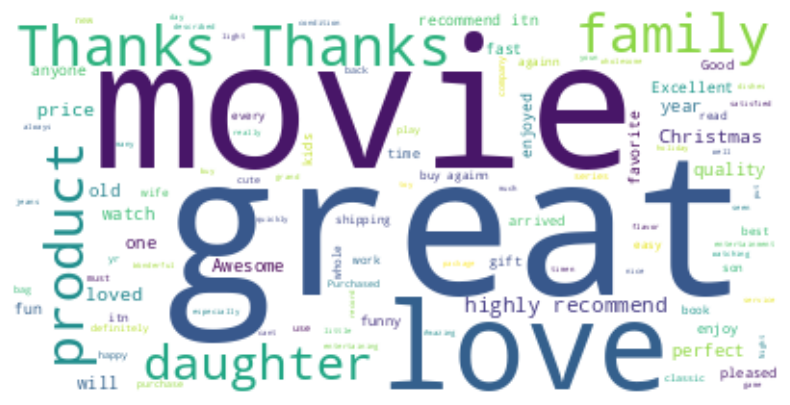

In [86]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_words=100, background_color="white").generate(' '.join(positive_reviews))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='biline# Filter out the positive reviews (sentiment = 1)
positive_reviews = df[df['predicted_sentiment'] == 1]['text']

# Display or save the positive reviews
print(positive_reviews)ar')
plt.axis("off")
plt.show()
